Temporalis and Prospective LCA of steel demand for passenger cars

package: 
- brightway 25
- PREMISE 

In [8]:
import bw2data as bd
import bw2calc as bc
import seaborn as sb
from bw_temporalis import easy_timedelta_distribution, TemporalisLCA
from bw_temporalis.lcia import characterize_co2

In [9]:
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd 

In [10]:
bd.projects

Brightway2 projects manager with 24 objects, including:
	BW2 introduction
	Carculator test
	MAXIMA
	My first LCA
	Newscore
	Premise
	SELFIE
	SELFIE paper
	Temporalis example project
	autumn school 2024
Use `sorted(projects)` to get full list, `projects.report()` to get
	a report on all projects.

In [11]:
bd.projects.set_current("bw25_intro")

In [47]:
list(bd.databases)

['biosphere',
 'ecoinvent-3.10-cutoff',
 'carbon fiber',
 'PV 2035',
 'PV 2050',
 'PV 2050 - eff',
 'PV 2050 - eff - lifetime',
 'World electricity mix 2050',
 'ei_cutoff_3.10_remind_SSP1-Base_2020 2024-11-14',
 'ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14',
 'ei_cutoff_3.10_image_SSP2-RCP19_2020 2024-11-14',
 'ei_cutoff_3.10_image_SSP2-RCP19_2050 2024-11-14',
 'ei_cutoff_3.10_remind_SSP1-PkBudg500_2020 2024-11-14',
 'ei_cutoff_3.10_remind_SSP1-PkBudg500_2050 2024-11-14',
 'ei_cutoff_3.10_remind_SSP2-PkBudg500_2020 2024-11-14',
 'ei_cutoff_3.10_remind_SSP2-PkBudg500_2050 2024-11-14',
 'example',
 'steel2025',
 'steel2026',
 'steel2027',
 'steel2028',
 'steel2029',
 'steel2030',
 'steel2031',
 'steel2032',
 'steel2033',
 'steel2034',
 'steel2035',
 'steel2036',
 'steel2037',
 'steel2038',
 'steel2039',
 'steel2040',
 'steel2041',
 'steel2042',
 'steel2043',
 'steel2044',
 'steel2045',
 'steel2046',
 'steel2047',
 'steel2048',
 'steel2049',
 'steel2050',
 'newsteel2025',
 'newsteel20

In [39]:
eidb = bd.Database('ecoinvent-3.10-cutoff')
eiSSP22020 = bd.Database('ei_cutoff_3.10_image_SSP2-RCP19_2020 2024-11-14')
eiSSP22050 = bd.Database('ei_cutoff_3.10_image_SSP2-RCP19_2050 2024-11-14')
eiSSP12020 = bd.Database('ei_cutoff_3.10_remind_SSP1-Base_2020 2024-11-14')
eiSSP12050 = bd.Database('ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14')

In [6]:
remind = {
    2020: 'ei_cutoff_3.10_remind_SSP1-Base_2020 2024-11-14',
    2050: 'ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14',
}

image = {
    2020: 'ei_cutoff_3.10_image_SSP2-RCP19_2020 2024-11-14',
    2050: 'ei_cutoff_3.10_image_SSP2-RCP19_2050 2024-11-14',
}

In [7]:
ipcc2021 = [m for m in bd.methods if 'IPCC' in str(m)
                    and ('2021') in str(m)
                    and 'GWP100' in str(m)
                    and 'no LT' not in str(m)
                    and 'SLCF' not in str(m)
           ][0]
ipcc2021

('ecoinvent-3.10',
 'IPCC 2021',
 'climate change',
 'global warming potential (GWP100)')

In [69]:
steel=[]
name = ['ei_cutoff_3.10_image_SSP2-RCP19_2020 2024-11-14', 'ei_cutoff_3.10_image_SSP2-RCP19_2050 2024-11-14', 'ei_cutoff_3.10_remind_SSP1-Base_2020 2024-11-14', 'ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14']
for exc in name:
    steel.append([act for act in bd.Database(exc)
            if 'market for steel,' in act['name']
               ])
steel

[['market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
  'market for steel, unalloyed' (kilogram, GLO, None),
  'market for steel, chromium steel 18/8' (kilogram, GLO, None),
  'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None),
  'market for steel, low-alloyed' (kilogram, GLO, None)],
 ['market for steel, chromium steel 18/8' (kilogram, GLO, None),
  'market for steel, low-alloyed' (kilogram, GLO, None),
  'market for steel, unalloyed' (kilogram, GLO, None),
  'market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
  'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None)],
 ['market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
  'market for steel, low-alloyed' (kilogram, GLO, None),
  'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None),
  'market for steel, unalloyed' (kilogram, GLO, None),
  'market for steel, chromium steel 18/8' (kilogram, GLO, None)],
 ['market for steel, unalloy

In [88]:
steel1=["blablabla"]
name = ['ei_cutoff_3.10_image_SSP2-RCP19_2020 2024-11-14', 'ei_cutoff_3.10_image_SSP2-RCP19_2050 2024-11-14', 'ei_cutoff_3.10_remind_SSP1-Base_2020 2024-11-14', 'ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14']
for exc in name:
    steel.append([act for act in bd.Database(exc)
            if 'market for reinforcing' in act['name']
               ])
steel2 = steel1+steel
steel2

['blablabla',
 ['market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
  'market for steel, unalloyed' (kilogram, GLO, None),
  'market for steel, chromium steel 18/8' (kilogram, GLO, None),
  'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None),
  'market for steel, low-alloyed' (kilogram, GLO, None)],
 ['market for steel, chromium steel 18/8' (kilogram, GLO, None),
  'market for steel, low-alloyed' (kilogram, GLO, None),
  'market for steel, unalloyed' (kilogram, GLO, None),
  'market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
  'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None)],
 ['market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
  'market for steel, low-alloyed' (kilogram, GLO, None),
  'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None),
  'market for steel, unalloyed' (kilogram, GLO, None),
  'market for steel, chromium steel 18/8' (kilogram, GLO, None)],
 ['market for 

In [71]:
database = [eiSSP22020, eiSSP22050, eiSSP12020, eiSSP12050]
prospeccar=[]
for i in database:
    car=[act for act in i if 'passenger car production, electric' in act['name']
                    and 'GLO' in act['location']][0]
    prospeccar.append(car)
prospeccar

['passenger car production, electric, without battery' (kilogram, GLO, None),
 'passenger car production, electric, without battery' (kilogram, GLO, None),
 'passenger car production, electric, without battery' (kilogram, GLO, None),
 'passenger car production, electric, without battery' (kilogram, GLO, None)]

In [60]:
for car in prospeccar:
    myFirstLCA = bc.LCA({car:1}) 
    print(myFirstLCA)
steel2

['market for steel, low-alloyed, hot rolled' (kilogram, GLO, None),
 'market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None),
 'market for steel, chromium steel 18/8' (kilogram, GLO, None),
 'market for steel, unalloyed' (kilogram, GLO, None),
 'market for steel, low-alloyed' (kilogram, GLO, None)]

In [70]:
steel_total=[]
steel2=steel[0]

    
for car in prospeccar:
    steel_amount=0
    for i in steel2:
        myFirstLCA = bc.LCA({car:1})
        myFirstLCA.lci()
        lca_value = myFirstLCA.supply_array[myFirstLCA.activity_dict[i.id]]
        print(myFirstLCA.activity_dict[i.id])
        print(i)
        steel_amount = steel_amount+lca_value 
        steel_total.append(steel_amount)

steel_total

10801
'market for steel, chromium steel 18/8, hot rolled' (kilogram, GLO, None)
20769
'market for steel, unalloyed' (kilogram, GLO, None)
5245
'market for steel, chromium steel 18/8' (kilogram, GLO, None)
10840
'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None)
21202
'market for steel, low-alloyed' (kilogram, GLO, None)


KeyError: 207974

In [8]:
def calculate_steel_amount(year, scenario):
    if scenario == "Base":
        database_name = remind[year]
    else:
        database_name = image[year]

    ### Define functional unit ###
    car = [act for act in bd.Database(database_name) if 'glider production, passenger car' in act['name']
                    and 'GLO' in act['location']][0]
    functional_unit = {car: 1} 
    
    ### Run LCA ###
    lca = bc.LCA(functional_unit)
    lca.lci()

    ### Find steel module amount ### 
    steel_amount = [act for act in bd.Database(database_name) if 'market for steel,' in act['name']
           ]+[act for act in bd.Database(database_name) if 'market for reinforcing steel' in act['name']
           ]
    total_lca = 0
    for i in steel_amount:
        lca_value = lca.supply_array[lca.activity_dict[i.id]]
        total_lca = lca_value+total_lca

    return total_lca

In [15]:
steel = [act for act in bd.Database( 'ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14') if 'market for steel,' in act['name']
                    and 'GLO' in act['location']][0]
functional_unit = {steel: calculate_steel_amount(2050,'ei_cutoff_3.10_remind_SSP1-Base_2050 2024-11-14')} 

In [25]:
ipcc2021 = [m for m in bd.methods if 'IPCC' in str(m)
                    and ('2021') in str(m)
                    and 'GWP100' in str(m)
                    and 'no LT' not in str(m)
                    and 'SLCF' not in str(m)
           ][0]
ipcc2021

('ecoinvent-3.10',
 'IPCC 2021',
 'climate change',
 'global warming potential (GWP100)')

In [17]:
lca=bc.LCA(functional_unit, ipcc2021)
lca.lci()    # Builds matrices, solves the system, generates an LCI matrix.
lca.lcia()   # Characterization, i.e. the multiplication of the elements 
                          # of the LCI matrix with characterization factors from the chosen method
lca.score 

4.285764116203784

In [97]:
calculate_steel_amount(2020, 'ei_cutoff_3.10_remind_SSP1-Base_2020 2024-11-14')

2.1781831873808146

In [100]:
calculate_steel_amount(2050, 'ei_cutoff_3.10_image_SSP2-RCP19_2050 2024-11-14')

2.1781831873808146

In [56]:
car=[act for act in eiSSP22020 if 'passenger car production, electric' in act['name']
                    and 'GLO' in act['location']
][0]
car

'passenger car production, electric, without battery' (kilogram, GLO, None)

In [57]:
type(car)

bw2data.backends.proxies.Activity

In [41]:
myFirstLCA = bc.LCA({car:1})

In [42]:
myFirstLCA.lci() 

In [46]:
steel[0][0]

'market for steel, low-alloyed, hot rolled' (kilogram, GLO, None)

In [47]:
lca_value = myFirstLCA.supply_array[myFirstLCA.activity_dict[steel[0][0].id]]
lca_value

0.19964128351420565

In [32]:
steel_amount=0
steel2=steel[0]
for i in steel2:
        lca_value = myFirstLCA.supply_array[myFirstLCA.activity_dict[i.id]]
        steel_amount=steel_amount+lca_value 

steel_amount

NameError: name 'steel' is not defined

In [33]:
CO2_amount=[]
for i in range(26):
    print(i)
    CO2_amount+= [-0.2688*(2025+i)+555.32]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [35]:
def database_car_SSP1(year,CO2):
    index= year-2025
    database={
                ('newsteel'+ str(year), "CO2"): {
                    "type": "emission",
                    "name": "carbon dioxide",
                    "unit": "kilogram",
                },
                
                ('newsteel'+ str(year), 'electric-car'): {
                    'name': 'produce an electric car',
                    'exchanges': [
                        {
                            'amount': 1,
                            'type': 'technosphere',
                            'input': ('newsteel'+ str(year), 'car-manufacture'),
                            'temporal_distribution': easy_timedelta_distribution(
                                start=-24,
                                end=-1,
                                resolution="M",
                                steps=12,
                                kind="triangular",
                                param=-12,
                            ),
                        },
                    ],
                },
                ('newsteel'+ str(year), 'car-manufacture'): {
                    'name': 'Manufacture the steel',
                    'exchanges': [
                        {
                            'amount': CO2[index],  # CO2 to produce steel from electric car
                            'input': ('newsteel'+ str(year), "CO2"),
                            'type': 'biosphere'
                        },
                    ]
                },
            }
    return bd.Database('newsteel'+ str(year)).write(database)

In [36]:
#database_car_SSP1(2025, CO2_amount)

In [37]:
for i in range(26):
    database_car_SSP1(2025+i, CO2_amount)

10:12:50 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:12:50 [info     ] Vacuuming database            
10:15:30 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3007.39it/s]


10:15:30 [info     ] Vacuuming database            
10:18:13 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:18:13 [info     ] Vacuuming database            
10:20:58 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:20:58 [info     ] Vacuuming database            
10:23:43 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:23:43 [info     ] Vacuuming database            
10:26:27 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:26:27 [info     ] Vacuuming database            
10:29:13 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:29:13 [info     ] Vacuuming database            
10:32:00 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:32:00 [info     ] Vacuuming database            
10:34:45 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:34:45 [info     ] Vacuuming database            
10:37:30 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:37:31 [info     ] Vacuuming database            
10:40:18 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:40:18 [info     ] Vacuuming database            
10:43:07 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:43:07 [info     ] Vacuuming database            
10:45:52 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:45:53 [info     ] Vacuuming database            
10:48:42 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3030.57it/s]


10:48:42 [info     ] Vacuuming database            
10:51:29 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:51:29 [info     ] Vacuuming database            
10:54:17 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:54:17 [info     ] Vacuuming database            
10:57:13 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


10:57:14 [info     ] Vacuuming database            
11:00:03 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:00:03 [info     ] Vacuuming database            
11:02:51 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:02:52 [info     ] Vacuuming database            
11:05:38 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:05:38 [info     ] Vacuuming database            
11:08:24 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:08:24 [info     ] Vacuuming database            
11:11:11 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:11:11 [info     ] Vacuuming database            
11:13:59 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:13:59 [info     ] Vacuuming database            
11:16:48 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:16:48 [info     ] Vacuuming database            
11:19:40 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:19:40 [info     ] Vacuuming database            
11:22:32 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


11:22:32 [info     ] Vacuuming database            


In [64]:
bd.Method(("GWP", "newsteel2025")).write([
    (('newsteel2025', "CO2"), 1),
])

In [65]:
firstlca = bc.LCA({('newsteel2050', 'electric-car'): 1}, ("GWP", "newsteel2050"))
firstlca.lci()
firstlca.lcia()
firstlca.score

4.28000020980835

In [66]:
tlca = TemporalisLCA(firstlca)

Starting graph traversal
Calculation count: 1


In [123]:
TemporalisLCA?

Init signature:
TemporalisLCA(
    lca_object: bw2calc.lca.LCA,
    starting_datetime: datetime.datetime | str = 'now',
    cutoff: float | None = 0.0005,
    biosphere_cutoff: float | None = 1e-06,
    max_calc: int | None = 2000,
    static_activity_indices: set[int] | None = None,
    skip_coproducts: bool | None = False,
    functional_unit_unique_id: int | None = -1,
    graph_traversal: bw_graph_tools.graph_traversal.new_node_each_visit.NewNodeEachVisitGraphTraversal | None = <class 'bw_graph_tools.graph_traversal.new_node_each_visit.NewNodeEachVisitGraphTraversal'>,
)
Docstring:     
Calculate an LCA using graph traversal, with edges using temporal distributions.

Edges with temporal distributions should store this information using `"temporal_distributions"`:

```python
    exchange["temporal_distribution"] = bw_temporalis.TemporalDistribution(
        times=numpy.array([-2, -1, 0, 1, 2], dtype="timedelta64[s]"),
        values=numpy.ones(5)
    )
```

Temporal distribution tim

In [67]:
tl = tlca.build_timeline()
df = tl.build_dataframe()

In [77]:
print(df)

                 date    amount    flow  activity  amount_sum
0 2023-02-15 06:44:54  0.136464  352315    352317    0.136464
1 2023-04-17 03:43:06  0.272928  352315    352317    0.409391
2 2023-06-17 00:41:18  0.409391  352315    352317    0.818783
3 2023-08-16 21:39:30  0.545855  352315    352317    1.364638
4 2023-10-16 18:37:42  0.682319  352315    352317    2.046957
5 2023-12-16 15:35:54  0.744348  352315    352317    2.791304
6 2024-02-15 12:34:06  0.595478  352315    352317    3.386783
7 2024-04-16 09:32:18  0.446609  352315    352317    3.833391
8 2024-06-16 06:30:30  0.297739  352315    352317    4.131131
9 2024-08-16 03:28:42  0.148870  352315    352317    4.280000


In [90]:
a=df["date"].copy()
type(a.values[0])

numpy.datetime64

In [114]:
testing_df=df.copy()
str(testing_df['date'].dt.year+25)#+ '-' +str(testing_df['date'].dt.month)
# testing_df['date'][0]#.month()
testing_df['datey']=testing_df['date'].dt.year+25
testing_df['datem']=testing_df['date'].dt.month
type(str(testing_df['datey'][0]))
testing_df['date_all']=testing_df['datem']
for i in range(len(testing_df['datey'])):
    testing_df['date_all'][i]=str(testing_df['datey'][i])+'-'+str(testing_df['datem'][i])
testing_df
df=testing_df

C:\Users\damor\AppData\Local\Temp\ipykernel_19416\2535186215.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  testing_df['date_all'][i]=str(testing_df['datey'][i])+'-'+str(testing_df['datem'][i])
C:\Users\damor\AppData\Local\Temp\ipykerne

In [ ]:
list_date=[2048,2048]

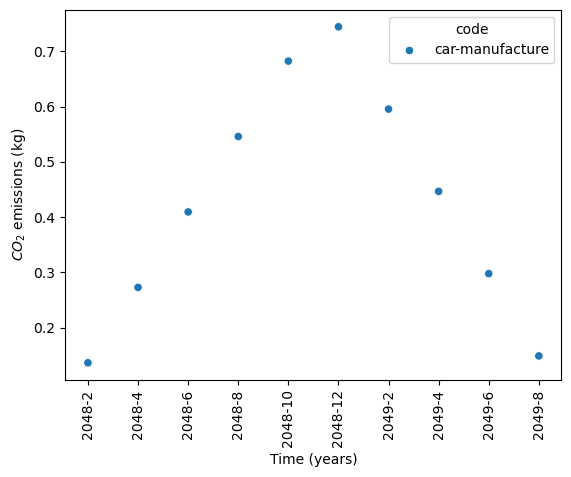

In [121]:
axes = sb.scatterplot(
    x="date_all", 
    y="amount",
    hue="code",
    data=df.merge(
        bd.Database('newsteel2050').nodes_to_dataframe().rename(columns={'id': 'activity'}), 
        on='activity'
    )
)
axes.set_ylabel("$CO_{2}$ emissions (kg)")
axes.set_xlabel("Time (years)")
axes.tick_params(axis='x', rotation=90)

Text(0.5, 0, 'Time (years)')

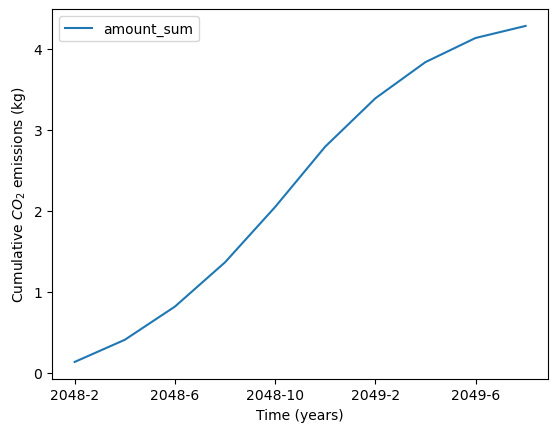

In [122]:
df["amount_sum"] = df['amount'].cumsum()
axes = df.plot(x="date_all", y="amount_sum")
axes.set_ylabel("Cumulative $CO_{2}$ emissions (kg)")
axes.set_xlabel("Time (years)")

In [128]:
def tempLCA(name,year):
    bd.Method(("GWP", name)).write([
    ((name, "CO2"), 1),
    ])
    firstlca = bc.LCA({(name, 'electric-car'): 1}, ("GWP", name))
    firstlca.lci()
    firstlca.lcia()
    firstlca.score
    tlca = TemporalisLCA(firstlca,starting_datetime=datetime.datetime(year, 1, 1))
    return tlca
    
    
    

In [127]:
TemporalisLCA?
# name

Init signature:
TemporalisLCA(
    lca_object: bw2calc.lca.LCA,
    starting_datetime: datetime.datetime | str = 'now',
    cutoff: float | None = 0.0005,
    biosphere_cutoff: float | None = 1e-06,
    max_calc: int | None = 2000,
    static_activity_indices: set[int] | None = None,
    skip_coproducts: bool | None = False,
    functional_unit_unique_id: int | None = -1,
    graph_traversal: bw_graph_tools.graph_traversal.new_node_each_visit.NewNodeEachVisitGraphTraversal | None = <class 'bw_graph_tools.graph_traversal.new_node_each_visit.NewNodeEachVisitGraphTraversal'>,
)
Docstring:     
Calculate an LCA using graph traversal, with edges using temporal distributions.

Edges with temporal distributions should store this information using `"temporal_distributions"`:

```python
    exchange["temporal_distribution"] = bw_temporalis.TemporalDistribution(
        times=numpy.array([-2, -1, 0, 1, 2], dtype="timedelta64[s]"),
        values=numpy.ones(5)
    )
```

Temporal distribution tim

In [61]:
tl=tempLCA('newsteel2050')

Starting graph traversal
Calculation count: 1


In [62]:
tl = tlca.build_timeline()
df = tl.build_dataframe()

Text(0.5, 0, 'Time (years)')

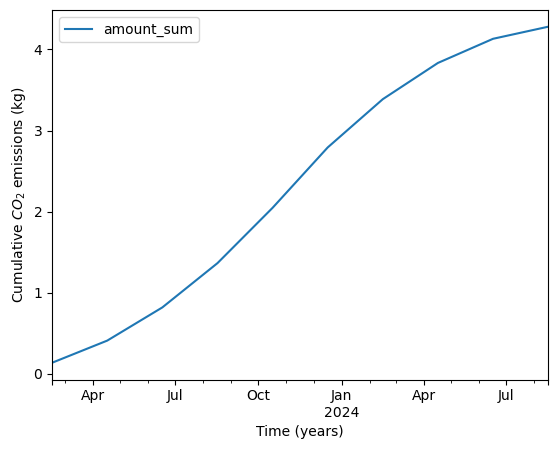

In [63]:
df["amount_sum"] = df['amount'].cumsum()
axes = df.plot(x="date", y="amount_sum")
axes.set_ylabel("Cumulative $CO_{2}$ emissions (kg)")
axes.set_xlabel("Time (years)")

In [183]:
import datetime
list_tlca_car=[]
for i in range(26):
    tlca=tempLCA('newsteel'+str(2025+i),i+2024)
    list_tlca_car+=[tlca]

    

Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculation count: 1
Starting graph traversal
Calculati

In [58]:
print(list_tlca_car)

[<bw_temporalis.lca.TemporalisLCA object at 0x00000270DFC58150>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFC78AD0>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270E0536FD0>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFCA49D0>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFCB2F90>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFCC2B50>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270E04BFA10>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFCC32D0>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFCD9790>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFD03410>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFD26A90>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFD1D690>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270DFC88550>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270E0769E50>, <bw_temporalis.lca.TemporalisLCA object at 0x00000270E0788150>, <bw_temporalis.lca.TemporalisLCA object

In [184]:
list_df_car=[]
for i in list_tlca_car:
    tl = i.build_timeline()
    df = tl.build_dataframe()
    list_df_car+= [df]

In [187]:
list_df_car[0]

,date,amount,flow,activity
0,2022-04-01 19:48:54,0.350725,352240,352242
1,2022-06-01 16:47:06,0.701449,352240,352242
2,2022-08-01 13:45:18,1.052174,352240,352242
3,2022-10-01 10:43:30,1.402899,352240,352242
4,2022-12-01 07:41:42,1.753623,352240,352242
5,2023-01-31 04:39:54,1.913043,352240,352242
6,2023-04-02 01:38:06,1.530435,352240,352242
7,2023-06-01 22:36:18,1.147826,352240,352242
8,2023-08-01 19:34:30,0.765217,352240,352242
9,2023-10-01 16:32:42,0.382609,352240,352242


In [151]:
list_df_car[1]

,date,amount,flow,activity,amount_sum
0,2023-04-02 19:48:54,0.342154,352243,352245,0.342154
1,2023-06-02 16:47:06,0.684308,352243,352245,1.026463
2,2023-08-02 13:45:18,1.026463,352243,352245,2.052925
3,2023-10-02 10:43:30,1.368617,352243,352245,3.421542
4,2023-12-02 07:41:42,1.710771,352243,352245,5.132313
5,2024-02-01 04:39:54,1.866296,352243,352245,6.998609
6,2024-04-02 01:38:06,1.493037,352243,352245,8.491645
7,2024-06-01 22:36:18,1.119777,352243,352245,9.611423
8,2024-08-01 19:34:30,0.746518,352243,352245,10.357941
9,2024-10-01 16:32:42,0.373259,352243,352245,10.731200


In [147]:
import matplotlib.pyplot as plt


In [190]:
df=list_df_car[1].copy()
for j in range(len(df)):
    df.loc[j,'date']=df.loc[j,'date'].replace(hour=1,)
    df.loc[j,'date']=df.loc[j,'date'].replace(minute=1)
    df.loc[j,'date']=df.loc[j,'date'].replace(second=1)
df.loc[:,'date']
df

,date,amount,flow,activity
0,2023-04-02 01:01:01,0.342154,352243,352245
1,2023-06-02 01:01:01,0.684308,352243,352245
2,2023-08-02 01:01:01,1.026463,352243,352245
3,2023-10-02 01:01:01,1.368617,352243,352245
4,2023-12-02 01:01:01,1.710771,352243,352245
5,2024-02-01 01:01:01,1.866296,352243,352245
6,2024-04-02 01:01:01,1.493037,352243,352245
7,2024-06-01 01:01:01,1.119777,352243,352245
8,2024-08-01 01:01:01,0.746518,352243,352245
9,2024-10-01 01:01:01,0.373259,352243,352245


In [199]:
display(list_df_car[0])
list_df_car[1]

,date,amount,flow,activity
0,2022-04-01 19:48:54,0.350725,352240,352242
1,2022-06-01 16:47:06,0.701449,352240,352242
2,2022-08-01 13:45:18,1.052174,352240,352242
3,2022-10-01 10:43:30,1.402899,352240,352242
4,2022-12-01 07:41:42,1.753623,352240,352242
5,2023-01-31 04:39:54,1.913043,352240,352242
6,2023-04-02 01:38:06,1.530435,352240,352242
7,2023-06-01 22:36:18,1.147826,352240,352242
8,2023-08-01 19:34:30,0.765217,352240,352242
9,2023-10-01 16:32:42,0.382609,352240,352242


,date,amount,flow,activity
0,2023-04-02 19:48:54,0.342154,352243,352245
1,2023-06-02 16:47:06,0.684308,352243,352245
2,2023-08-02 13:45:18,1.026463,352243,352245
3,2023-10-02 10:43:30,1.368617,352243,352245
4,2023-12-02 07:41:42,1.710771,352243,352245
5,2024-02-01 04:39:54,1.866296,352243,352245
6,2024-04-02 01:38:06,1.493037,352243,352245
7,2024-06-01 22:36:18,1.119777,352243,352245
8,2024-08-01 19:34:30,0.746518,352243,352245
9,2024-10-01 16:32:42,0.373259,352243,352245


In [198]:
res#.groupby('date').sum()

,date,amount,flow,activity,amount_sum
0,2022-04-01 01:01:01,0.350725,352240,352242,0.350725
1,2022-06-01 01:01:01,0.701449,352240,352242,1.052174
2,2022-08-01 01:01:01,1.052174,352240,352242,2.104348
3,2022-10-01 01:01:01,1.402899,352240,352242,3.507246
4,2022-12-01 01:01:01,1.753623,352240,352242,5.260870
5,2023-01-01 01:01:01,1.913043,352240,352242,7.173913
6,2023-04-01 01:01:01,1.872589,704483,704487,9.046502
7,2023-06-01 01:01:01,1.832135,704483,704487,10.878637
8,2023-08-01 01:01:01,1.791680,704483,704487,12.670317
9,2023-10-01 01:01:01,1.751226,704483,704487,14.421542


C:\Users\damor\AppData\Local\Temp\ipykernel_19416\3427441104.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res=pd.concat([res,df])


Text(0.5, 0, 'Time (years)')

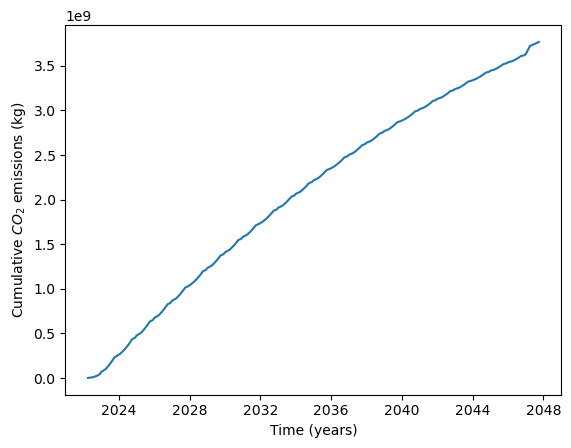

In [209]:
res=pd.DataFrame(columns=list_df_car[0].columns)
for i in range(len(list_df_car)):
    df=list_df_car[i].copy()
    # print(i)
    for j in range(len(df)):
        df.loc[j,'date']=df.loc[j,'date'].replace(hour=1,)
        df.loc[j,'date']=df.loc[j,'date'].replace(minute=1)
        df.loc[j,'date']=df.loc[j,'date'].replace(second=1)
        df.loc[j,'date']=df.loc[j,'date'].replace(day=1)
    # df.loc[:,'date']
    df["amount_sum"] = df['amount'].cumsum()
    res=pd.concat([res,df])
    # plt.plot(df['date'],df["amount_sum"])
    # axes = df.plot(x="date", y="amount_sum")
    # axes.set_ylabel("Cumulative $CO_{2}$ emissions (kg)")
    # axes.set_xlabel("Time (years)")

res=res.groupby('date').sum()
res=res.reset_index(0).reset_index(drop=True)
res['true amount_sum']=res['amount_sum'].cumsum()
plt.plot(res['date'],res["true amount_sum"]*3500000)
plt.ylabel("Cumulative $CO_{2}$ emissions (kg)")
plt.xlabel("Time (years)")


0
1


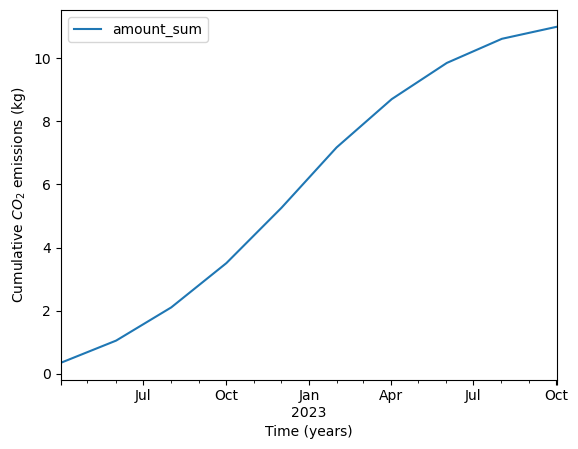

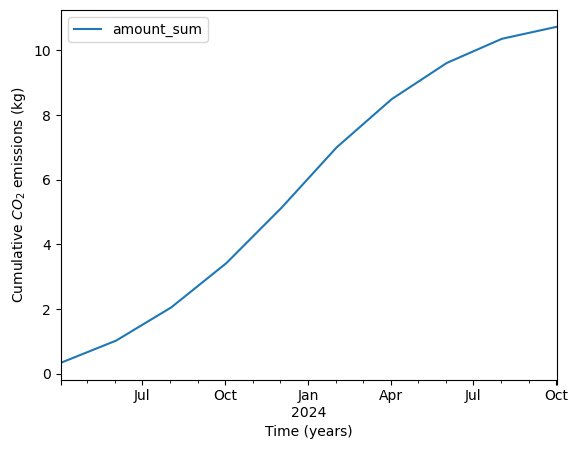

In [143]:
for i in range(2):
    df=list_df_car[i]
    print(i)
    df["amount_sum"] = df['amount'].cumsum()
    axes = df.plot(x="date", y="amount_sum")
    axes.set_ylabel("Cumulative $CO_{2}$ emissions (kg)")
    axes.set_xlabel("Time (years)")